## ISI Epilepsy Brno & Montreal Dataframes with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of "SOZ" using H2o AutoML on "11" Outcome

14/9/2022

---

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/new_isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


In [3]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,0.781969,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,0.780688,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,0.740345,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,0.721173,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,0.937518,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


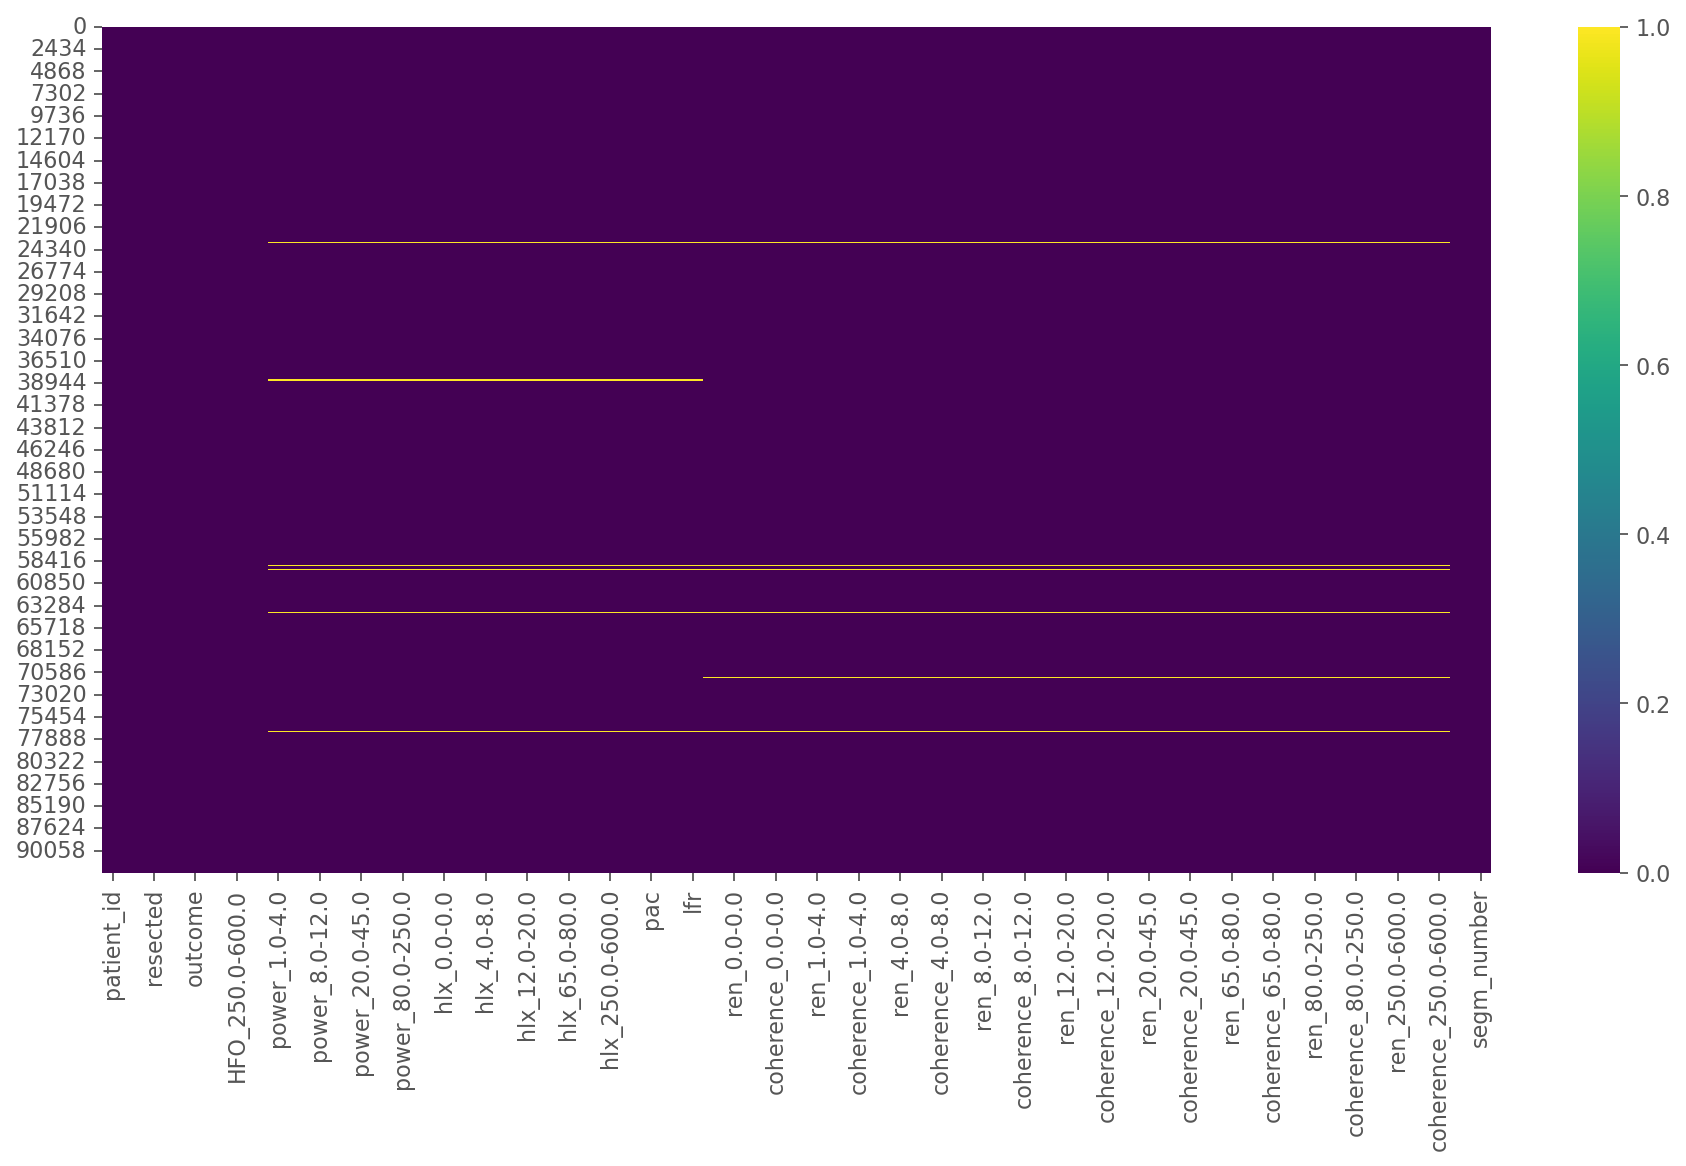

In [4]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160
sns.heatmap(epilepsy.isnull(), cmap = 'viridis', cbar = True);

#pd.options.display.min_rows = 30
#epilepsy.isnull().sum()

In [5]:
# Keep only segm_type = 4 

epilepsy_4 = epilepsy.loc[epilepsy['segm_type'] == 4]
epilepsy_4.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0


In [6]:
# Keep only outcome = 11 

epilepsy_11 = epilepsy_4.loc[epilepsy_4['outcome'] == 11]
epilepsy_11.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0


In [7]:
# Show unique patient_id

epilepsy_11.patient_id.unique()

array([ 583,  657,  953,  965, 1002, 1021, 1041,  723, 1043,  717, 1630,
         61,   63,   71,   77,   82,   89,   93], dtype=int64)

In [8]:
# Split epilepsy_11 dataframe to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy_11.groupby(epilepsy_11['patient_id'] < 100)]

In [9]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

7

In [10]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

11

In [11]:
# Country column

pd.options.mode.chained_assignment = None
epilepsy_11.loc[epilepsy_11['patient_id'] < 100 , 'country'] = 'Brno' 
epilepsy_11.loc[epilepsy_11['patient_id'] > 100 , 'country'] = 'Montreal' 
epilepsy_11.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0,Montreal
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0,Montreal
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0,Montreal
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0,Montreal
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0,Montreal


In [12]:
# Onset channels in numbers based on country

epilepsy_11.groupby(['country', 'patient_id'])['onset_channel'].count()

country   patient_id
Brno      61            151
          63            120
          71            169
          77            168
          82             85
          89            170
          93            160
Montreal  583            87
          657            45
          717            71
          723            86
          953            88
          965            86
          1002           67
          1021           59
          1041          107
          1043           71
          1630          171
Name: onset_channel, dtype: int64

In [13]:
# Onset channels in numbers based on SOZ 

epilepsy_11.groupby(['onset_channel', 'patient_id'])['onset_channel'].count()

onset_channel  patient_id
NON_SOZ        61            142
               63            117
               71            160
               77            166
               82             74
               89            161
               93            154
               583            84
               657            37
               717            61
               723            71
               953            81
               965            80
               1002           55
               1021           41
               1041           79
               1043           62
               1630          161
SOZ            61              9
               63              3
               71              9
               77              2
               82             11
               89              9
               93              6
               583             3
               657             8
               717            10
               723            15
               95

In [14]:
# Testing dataframe

testing_df = epilepsy_11.loc[epilepsy_11['patient_id'] == 1041]
testing_df.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
35860,1041,la1,0,NON_SOZ,11.0,61,41,0,0.527295,0.190212,...,0.047633,0.902236,0.967007,0.899467,0.032641,0.821885,0.936441,4,0,Montreal
35861,1041,la10,1,NON_SOZ,11.0,4,2,15,0.522892,0.288765,...,0.027431,0.853710,0.961169,0.906775,0.023780,0.829388,0.940038,4,0,Montreal
35862,1041,la2,0,NON_SOZ,11.0,58,38,80,0.556295,0.230107,...,0.014383,0.959950,0.987514,0.966528,0.013049,0.923064,0.977450,4,0,Montreal
35863,1041,la3,1,NON_SOZ,11.0,75,11,71,0.614911,0.270569,...,0.004420,0.983385,0.996947,0.968313,0.012375,0.926040,0.978447,4,0,Montreal
35864,1041,la4,1,NON_SOZ,11.0,89,7,65,0.674321,0.340150,...,0.002980,0.986928,0.997876,0.968713,0.012769,0.927198,0.978726,4,0,Montreal


In [15]:
# Show unique patient_id in testing dataframe

testing_df.patient_id.unique()

array([1041], dtype=int64)

In [16]:
# Show testing_df

testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 35860 to 35966
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   107 non-null    int64  
 1   channel_name                 107 non-null    object 
 2   resected                     107 non-null    int64  
 3   onset_channel                107 non-null    object 
 4   outcome                      107 non-null    float64
 5   HFO_80.0-250.0               107 non-null    int64  
 6   HFO_250.0-600.0              107 non-null    int64  
 7   spike_rate                   107 non-null    int64  
 8   power_1.0-4.0                107 non-null    float64
 9   power_4.0-8.0                107 non-null    float64
 10  power_8.0-12.0               107 non-null    float64
 11  power_12.0-20.0              107 non-null    float64
 12  power_20.0-45.0              107 non-null    float64
 13  power_65.0-80.

In [17]:
# Drop columns no. 0, 1, 2, 4, 65, 66, 67

testing_df_drop = testing_df.drop(testing_df.columns[[0, 1, 2, 4, 65, 66, 67 ]], axis=1)
testing_df_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
35860,NON_SOZ,61,41,0,0.527295,0.190212,0.194513,0.181204,0.042685,0.001365,...,0.890241,0.962474,0.936287,0.047633,0.902236,0.967007,0.899467,0.032641,0.821885,0.936441
35861,NON_SOZ,4,2,15,0.522892,0.288765,0.290193,0.262431,0.056474,0.001695,...,0.849197,0.963806,0.924675,0.027431,0.853710,0.961169,0.906775,0.023780,0.829388,0.940038
35862,NON_SOZ,58,38,80,0.556295,0.230107,0.266866,0.252279,0.056271,0.002099,...,0.948792,0.982798,0.976427,0.014383,0.959950,0.987514,0.966528,0.013049,0.923064,0.977450
35863,NON_SOZ,75,11,71,0.614911,0.270569,0.340979,0.322704,0.070839,0.002208,...,0.985730,0.997313,0.994595,0.004420,0.983385,0.996947,0.968313,0.012375,0.926040,0.978447
35864,NON_SOZ,89,7,65,0.674321,0.340150,0.461153,0.438884,0.094838,0.002899,...,0.993850,0.999023,0.996223,0.002980,0.986928,0.997876,0.968713,0.012769,0.927198,0.978726


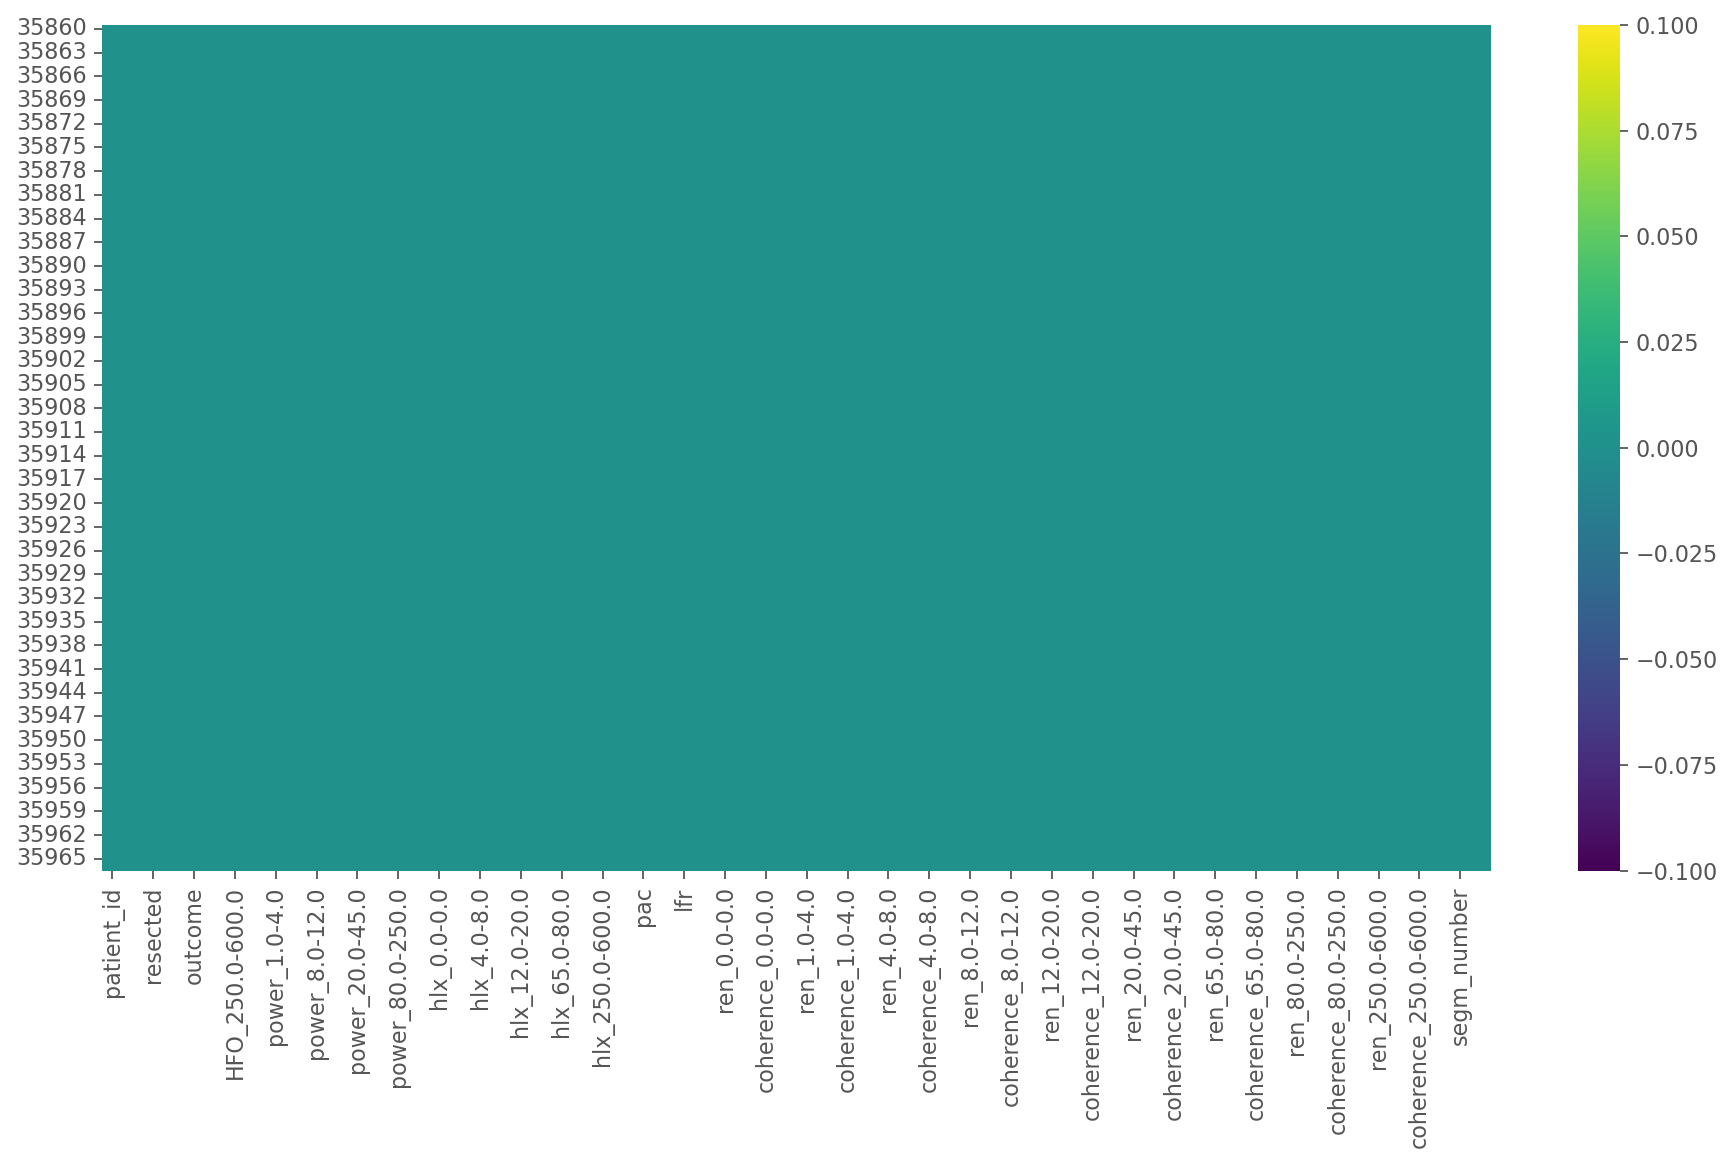

In [18]:
# Show null columns in testing dataframe

sns.heatmap(testing_df.isnull(), cmap = 'viridis', cbar = True);

In [19]:
# Training dataframe

delete_row = epilepsy_11[epilepsy_11["patient_id"] == 1041].index
training_df = epilepsy_11.drop(delete_row)
training_df.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0,Montreal
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0,Montreal
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0,Montreal
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0,Montreal
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0,Montreal


In [20]:
# Show unique patient_id in training dataframe

training_df.patient_id.unique()

array([ 583,  657,  953,  965, 1002, 1021,  723, 1043,  717, 1630,   61,
         63,   71,   77,   82,   89,   93], dtype=int64)

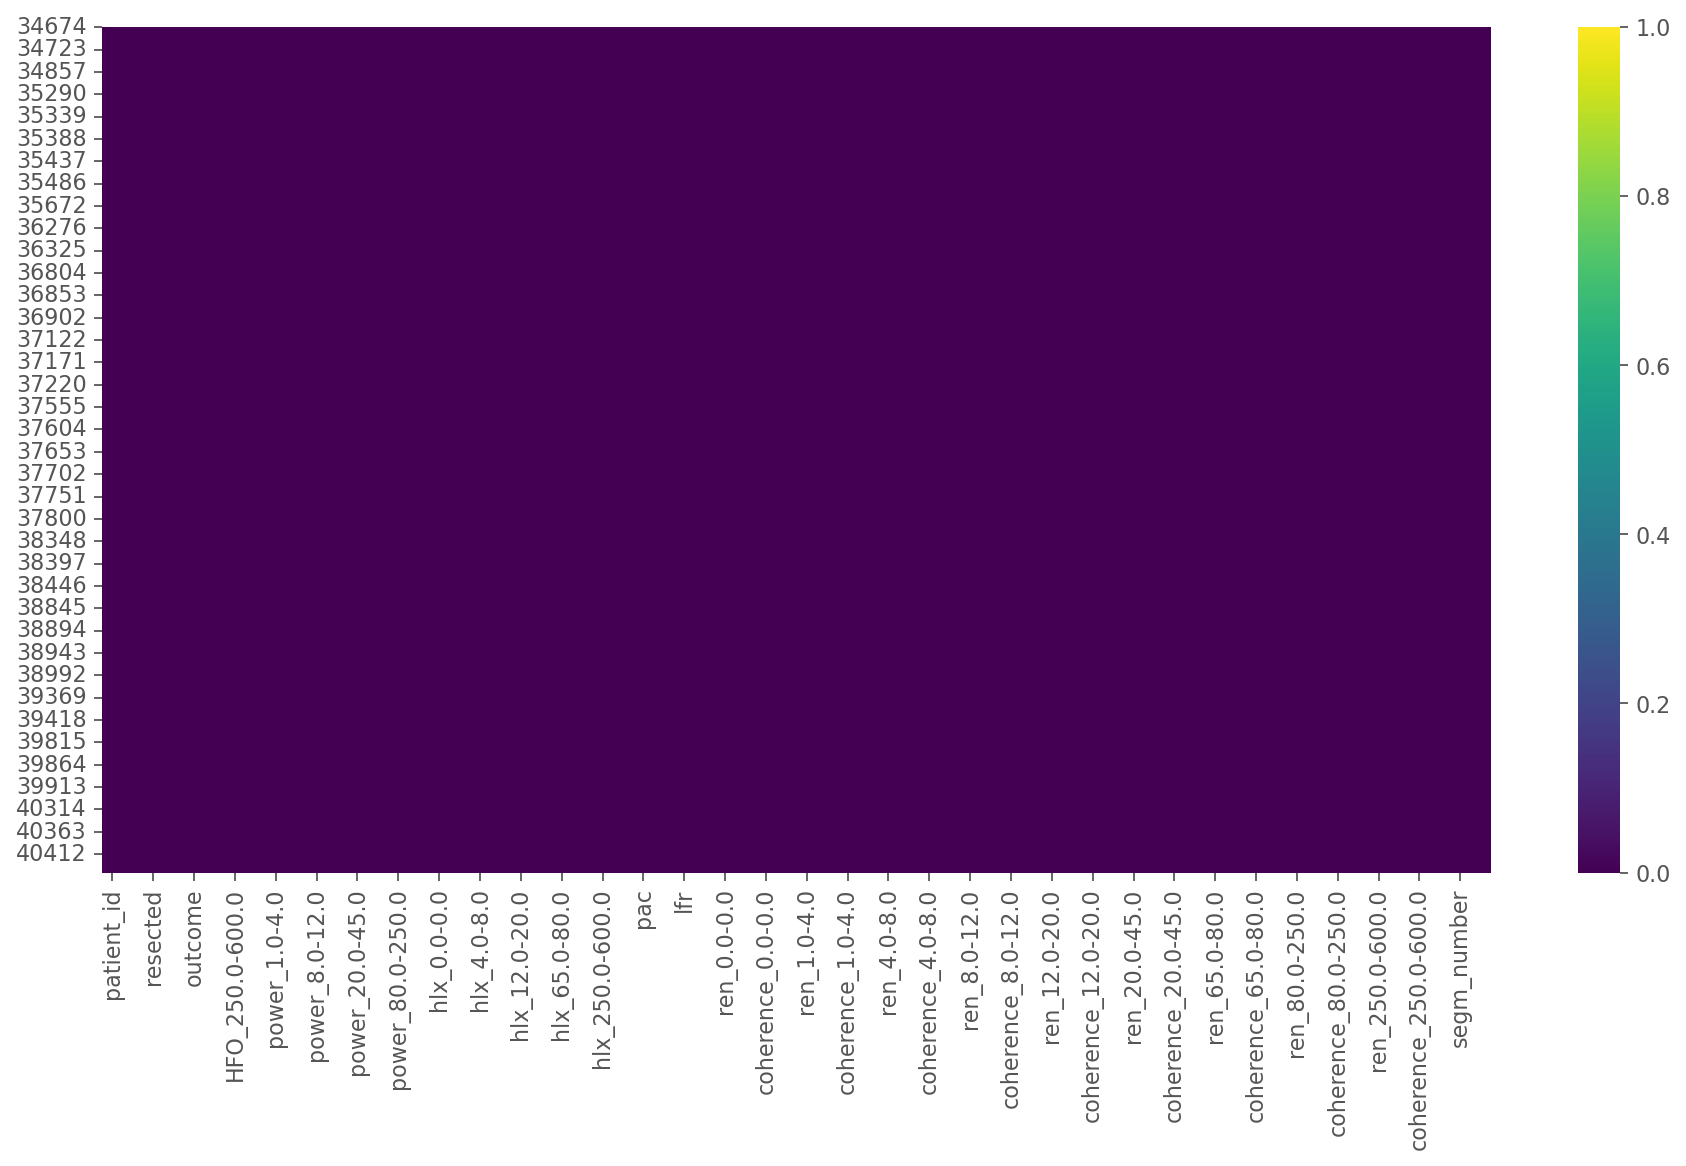

In [21]:
# Show null columns in training dataframe

sns.heatmap(training_df.isnull(), cmap = 'viridis', cbar = True);

In [22]:
# Show training_df

training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 34674 to 40452
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   1854 non-null   int64  
 1   channel_name                 1854 non-null   object 
 2   resected                     1854 non-null   int64  
 3   onset_channel                1854 non-null   object 
 4   outcome                      1854 non-null   float64
 5   HFO_80.0-250.0               1854 non-null   int64  
 6   HFO_250.0-600.0              1854 non-null   int64  
 7   spike_rate                   1854 non-null   int64  
 8   power_1.0-4.0                1854 non-null   float64
 9   power_4.0-8.0                1854 non-null   float64
 10  power_8.0-12.0               1854 non-null   float64
 11  power_12.0-20.0              1854 non-null   float64
 12  power_20.0-45.0              1854 non-null   float64
 13  power_65.0-80

In [23]:
# Drop columns no. 0, 1, 2, 4, 65, 66, 67

training_df_drop = training_df.drop(training_df.columns[[0, 1, 2, 4, 65, 66, 67 ]], axis=1)
training_df_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
34674,NON_SOZ,19,56,50,0.526201,0.474988,0.309262,0.364289,0.237353,0.007892,...,0.971446,0.994984,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141
34675,NON_SOZ,35,62,86,0.560877,0.560381,0.374400,0.447637,0.290251,0.009658,...,0.997157,0.999653,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048
34676,NON_SOZ,36,66,101,0.558763,0.576171,0.389969,0.467600,0.301467,0.009999,...,0.997194,0.999641,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657
34677,NON_SOZ,47,66,102,0.554024,0.565439,0.381853,0.453898,0.290972,0.009569,...,0.988372,0.998245,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107
34678,NON_SOZ,32,75,96,0.649021,0.658895,0.427324,0.507019,0.320779,0.010582,...,0.955550,0.991911,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945


## CLASSIFICATION PROBLEM
Predicting "Onset_channel" based on "Outcome = 11" & "Segm_type = 4", split 17 patients for training vs 1 patient for testing

In [24]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from C:\Users\marek\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\marek\AppData\Local\Temp\tmple4uf5lu
  JVM stdout: C:\Users\marek\AppData\Local\Temp\tmple4uf5lu\h2o_Rodina_started_from_python.out
  JVM stderr: C:\Users\marek\AppData\Local\Temp\tmple4uf5lu\h2o_Rodina_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,3 months and 10 days !!!
H2O_cluster_name:,H2O_from_python_Rodina_he2ktj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.531 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [25]:
# Parse dataframes to H2o

train = h2o.H2OFrame(training_df_drop)
test = h2o.H2OFrame(testing_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Train dataframe summary describe

train.describe()

Rows:1854
Cols:61




,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
type,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.0,0.0,0.0,1.1826376628302974e-08,1.8638407384680984e-09,4.766788749889558e-10,6.22031616719175e-10,2.1963038986838512e-10,3.4960783522950397e-12,1.058213811237117e-11,1.59087007998756e-11,3.858667532602946,1.122020035982132,1.0508635320266089,1.0155952588717143,1.0245686505238216,1.066467293103536,1.0053633546829224,1.007588633298874,1.036214944124222,1.3500831046437054e-07,-0.0171302647654522,-0.0495011295057419,0.0015798821801945,-0.5421305097146736,0.0001677830344048,0.2385681683663278,0.7571351392567158,-0.6001673864743983,1.2975392178683858e-05,0.4559963138649861,0.8199521092077097,-0.4964481848354141,8.709023608541126e-06,0.392923627247413,0.8083997543652852,-0.4686981505885099,8.48915192155649e-06,0.3944367583064983,0.8272889363765716,-0.5212810827450206,9.50278950313077e-06,0.267083690110594,0.794589437643687,-0.5645505384852488,2.587170952172831e-05,0.178333163637047,0.7805999304850896,-0.299986646969337,0.0001282283776617,0.2004972866674264,0.78922756254673,-0.1576321234771361,0.0001267271624237,0.0823380997315204,0.5723959324757258,-0.124110395940952,0.0003117441844187,0.0761130808511128,0.5353593720992407
mean,,18.84196332254584,20.095469255663414,22.480582524271853,0.23606380960744813,0.22802294439718662,0.2164340045994166,0.48485699096963586,0.14162499852489036,0.0052923782336663045,0.0371929783927452,0.0058048041360059385,22.86300418900722,1.3029931594865947,1.0696896600782184,1.0235230825383324,1.0342805686664855,1.096935154487444,1.0065311942303918,1.194132054910222,1.091611212346889,0.1983436240768247,0.0006302752195459677,0.00048156889777017166,0.16342967826498034,0.7373475549332944,0.18742366589828127,0.8755388512999116,0.9577734374981497,0.7945736987820752,0.1940755090935731,0.8303136039336199,0.9512370536192353,0.8321631740548247,0.08465889031604122,0.8370667737311616,0.9554218584207954,0.8425321840658495,0.053212407574353915,0.8440008589989224,0.9578395008488656,0.8475654964041592,0.04400002200883287,0.8326917811191468,0.9550864147932483,0.8265805822066461,0.05134902707199973,0.7886111763549425,0.9428327112428708,0.7561010145351141,0.033934269118272804,0.7231072911818114,0.9250405058850164,0.7131114553221289,0.06911623898515878,0.6631675959328375,0.9051708333665232,0.6050288937508682,0.0359596140314936,0.5624942659973197,0.8708106900967918
maxs,,125.0,282.0,724.0,3.3898550228527218,4.3489998570881,4.894479046433155,18.690419429107656,4.15884444848319,0.0741138181039369,1.009781330122556,0.1483456896931834,106.99863774617512,1.420734569231669,1.084064398407936,1.0292266770203908,1.043600591222445,1.1172203421592712,1.0091928533713024,1.300721081495285,1.1669275335470837,0.6463271533

In [27]:
# Test dataframe summary describe

test.describe()

Rows:107
Cols:68




,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
type,int,string,int,enum,int,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,enum
mins,1041.0,NaN,0.0,,11.0,0.0,0.0,0.0,0.3642559630888586,0.0625865772772211,0.0225953940690036,0.0214706578544652,0.0049569883102734,0.0003572000705432,0.0002579450179025,6.730804667734005e-06,12.065984590848286,1.206187949379285,1.063969711661339,1.0223124931255976,1.0323516126473744,1.094742313226064,1.0058363886674244,1.1847119585673014,1.0765187843640645,0.3817813618536348,-0.0036975225313519,-0.0228505562728376,0.0150320927102843,-0.5919939587855091,0.0210325304094779,0.3380921505826215,0.8054088815053304,-0.3583188535630082,0.0069421183047112,0.5035571828422447,0.8547070387999217,0.2715175798819594,0.0016113869421193,0.4862846725434064,0.8564991692701975,0.637957359427237,0.0008445178385197,0.6966252393089235,0.9158423946301142,0.6760868103305498,0.00051606550768,0.7260958728442589,0.9162802815437316,0.7386180746058623,0.0003313656253734,0.6599345779418946,0.9019598042964936,0.261035988246634,0.0004096215911764,0.3149520935801168,0.8144946211576461,0.5359381686647733,0.0017433613418446,0.4738610776265462,0.8276553231477738,0.8530635253588359,0.0103589356004768,0.7726770186424256,0.9116800224781036,4.0,0.0,
mean,1041.0,NaN,0.2616822429906542,,11.0,21.794392523364483,6.121495327102806,19.0841121495327,0.7706301277128013,0.603167725448942,0.8062832000984982,0.790659443403187,0.17434626580484636,0.005256846947193827,0.007936963650234415,0.0007037736522462187,25.3499317629018,1.2618250857223974,1.068081989098932,1.023682277887781,1.0351368242205117,1.0970310517894895,1.0062870872094993,1.2006639981121292,1.0773917710966792,0.4377929879757472,0.0007208122112347743,-0.0007289589743463041,0.06896744070876051,0.8106849118377887,0.15478302763195634,0.795686167819263,0.9388614969117988,0.9045206594142207,0.1242326478146175,0.9066677624591106,0.9748304430708705,0.9480374748132675,0.0409243736275387,0.9355111283395509,0.9830495735761533,0.9728544746160654,0.01914282635846782,0.9607416305561606,0.9903492192390181,0.9801971974233135,0.013064312186873983,0.9669116560757348,0.9923306560869154,0.9787572849823691,0.01282433706366173,0.9612379587021572,0.990914055190725,0.9610138428961745,0.010510436916082768,0.943430571933901,0.9855137555157282,0.9706556136403348,0.01470023620690883,0.9475106989845308,0.9860151783922382,0.9516077310496773,0.017018539083386436,0.9001112648538337,0.9681071181609252,4.0,0.0,
maxs,1041.0,NaN,1.0,,11.0,89.0,96.0,120.0,2.146471710748066,2.1613808796831084,3.1239915139879626,3.1156291655458244,0.7083612840728297,0.0210418890239008,0.0326318276032382,0.0029413970226985,39.5948575258255,1.3059583606

In [28]:
# Define X and y

X = train.columns
y = 'onset_channel'
X.remove(y)

In [29]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'onset_channel'

In [30]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [31]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |
05:50:15.640: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 9min 56s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_1_20220906_55015

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.002724538913587526
RMSE: 0.052197115950860025
LogLoss: 0.023858994553846803
Null degrees of freedom: 1853
Residual degrees of freedom: 1842
Null deviance: 1027.216230501327
Residual deviance: 88.46915180566405
AIC: 112.46915180566405
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7917708598785514: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1707.0,0.0,0.0,(0.0/1707.0)
1,SOZ,0.0,147.0,0.0,(0.0/147.0)
2,Total,1707.0,147.0,0.0,(0.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.791771,1.000000,70.0
1,max f2,0.791771,1.000000,70.0
2,max f0point5,0.791771,1.000000,70.0
3,max accuracy,0.791771,1.000000,70.0
4,max precision,0.999174,1.000000,0.0
5,max recall,0.791771,1.000000,70.0
6,max specificity,0.999174,1.000000,0.0
7,max absolute_mcc,0.791771,1.000000,70.0
8,max min_per_class_accuracy,0.791771,1.000000,70.0
9,max mean_per_class_accuracy,0.791771,1.000000,70.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  9.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.998410,12.612245,12.612245,1.000000,0.998808,1.000000,0.998808,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.996567,12.612245,12.612245,1.000000,0.997490,1.000000,0.998149,0.129252,0.258503,1161.224490,1161.224490,0.258503
2,3,0.030205,0.994679,12.612245,12.612245,1.000000,0.995525,1.000000,0.997306,0.122449,0.380952,1161.224490,1161.224490,0.380952
3,4,0.040453,0.992154,12.612245,12.612245,1.000000,0.993316,1.000000,0.996295,0.129252,0.510204,1161.224490,1161.224490,0.510204
4,5,0.050162,0.989428,12.612245,12.612245,1.000000,0.990548,1.000000,0.995183,0.122449,0.632653,1161.224490,1161.224490,0.632653
5,6,0.100324,0.156502,7.323239,9.967742,0.580645,0.656856,0.790323,0.826019,0.367347,1.000000,632.323897,896.774194,0.977153
6,7,0.149946,0.069973,0.000000,6.669065,0.000000,0.106172,0.528777,0.587796,0.000000,1.000000,-100.000000,566.906475,0.923257
7,8,0.200108,0.044194,0.000000,4.997305,0.000000,0.055960,0.396226,0.454479,0.000000,1.000000,-100.000000,399.730458,0.868776
8,9,0.299892,0.020382,0.000000,3.334532,0.000000,0.030715,0.264388,0.313478,0.000000,1.000000,-100.000000,233.453237,0.760398
9,10,0.400216,0.010625,0.000000,2.498652,0.000000,0.015110,0.198113,0.238685,0.000000,1.000000,-100.000000,149.865229,0.651435




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03729718760046217
RMSE: 0.1931247979946184
LogLoss: 0.13342530880737735
Null degrees of freedom: 1853
Residual degrees of freedom: 1844
Null deviance: 1028.8842990669814
Residual deviance: 494.7410450577552
AIC: 514.7410450577552
AUC: 0.9446038520856498
AUCPR: 0.7332164989828507
Gini: 0.8892077041712996

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36846408148633125: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1673.0,34.0,0.0199,(34.0/1707.0)
1,SOZ,58.0,89.0,0.3946,(58.0/147.0)
2,Total,1731.0,123.0,0.0496,(92.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.368464,0.659259,109.0
1,max f2,0.122543,0.705742,195.0
2,max f0point5,0.651027,0.753715,71.0
3,max accuracy,0.651027,0.953614,71.0
4,max precision,0.999248,1.000000,0.0
5,max recall,0.000971,1.000000,397.0
6,max specificity,0.999248,1.000000,0.0
7,max absolute_mcc,0.448804,0.641391,96.0
8,max min_per_class_accuracy,0.070847,0.877551,237.0
9,max mean_per_class_accuracy,0.060059,0.890642,251.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  7.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.961909,12.612245,12.612245,1.000000,0.980664,1.000000,0.980664,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.903703,11.284640,11.948443,0.894737,0.932710,0.947368,0.956687,0.115646,0.244898,1028.464017,1094.844253,0.243726
2,3,0.030205,0.840237,10.510204,11.486152,0.833333,0.878565,0.910714,0.931576,0.102041,0.346939,951.020408,1048.615160,0.344010
3,4,0.040453,0.726729,9.957035,11.098776,0.789474,0.778988,0.880000,0.892921,0.102041,0.448980,895.703545,1009.877551,0.443707
4,5,0.050162,0.530007,6.306122,10.171165,0.500000,0.616167,0.806452,0.839356,0.061224,0.510204,530.612245,917.116524,0.499659
5,6,0.100324,0.191398,4.068466,7.119816,0.322581,0.325017,0.564516,0.582186,0.204082,0.714286,306.846610,611.981567,0.666834
6,7,0.149946,0.098525,2.056344,5.444134,0.163043,0.139234,0.431655,0.435598,0.102041,0.816327,105.634428,444.413449,0.723766
7,8,0.200108,0.059144,2.034233,4.589361,0.161290,0.074486,0.363881,0.345077,0.102041,0.918367,103.423305,358.936135,0.780113
8,9,0.299892,0.031522,0.409046,3.198429,0.032432,0.043315,0.253597,0.244670,0.040816,0.959184,-59.095422,219.842901,0.716067
9,10,0.400216,0.017684,0.067808,2.413664,0.005376,0.023844,0.191375,0.189315,0.006803,0.965986,-93.219223,141.366412,0.614493




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.952152,0.010851,0.939791,0.966006,0.958005,0.942779,0.954178
1,auc,0.944422,0.028635,0.945492,0.977051,0.963768,0.903185,0.932614
2,err,0.047848,0.010851,0.060209,0.033994,0.041995,0.057221,0.045822
3,err_count,17.800000,4.324350,23.000000,12.000000,16.000000,21.000000,17.000000
4,f0point5,0.707107,0.124104,0.606936,0.787402,0.846774,0.551181,0.743243
5,f1,0.686453,0.078010,0.646154,0.769231,0.724138,0.571429,0.721311
6,f2,0.673811,0.061850,0.690789,0.751880,0.632530,0.593220,0.700637
7,lift_top_group,12.876019,2.032068,13.172414,13.074074,10.583333,15.956522,11.593750
8,logloss,0.132773,0.017100,0.134949,0.104076,0.134410,0.141411,0.149022
9,max_per_class_error,0.331118,0.069829,0.275862,0.259259,0.416667,0.391304,0.312500



See the whole table with table.as_data_frame()


In [32]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_6_AutoML_1_20220906_55015,0.944604,0.133425,0.733216,0.207238,0.193125,0.0372972
StackedEnsemble_Best1000_1_AutoML_1_20220906_55015,0.944542,0.133957,0.730965,0.190345,0.194018,0.037643
StackedEnsemble_AllModels_4_AutoML_1_20220906_55015,0.944004,0.135018,0.727174,0.184714,0.194348,0.037771
StackedEnsemble_BestOfFamily_4_AutoML_1_20220906_55015,0.943733,0.135186,0.729524,0.164712,0.194244,0.0377306
StackedEnsemble_AllModels_3_AutoML_1_20220906_55015,0.943327,0.136286,0.725932,0.196269,0.195065,0.0380503
StackedEnsemble_BestOfFamily_6_AutoML_1_20220906_55015,0.943171,0.13555,0.729126,0.164712,0.194552,0.0378505
StackedEnsemble_AllModels_1_AutoML_1_20220906_55015,0.941982,0.139524,0.711231,0.199963,0.198108,0.0392466
StackedEnsemble_BestOfFamily_2_AutoML_1_20220906_55015,0.941633,0.14028,0.706827,0.214041,0.198433,0.0393757
StackedEnsemble_AllModels_2_AutoML_1_20220906_55015,0.938465,0.141691,0.698216,0.198026,0.199297,0.0397194
StackedEnsemble_BestOfFamily_3_AutoML_1_20220906_55015,0.938138,0.140859,0.707814,0.163654,0.197853,0.0391456


In [33]:
# Explain a single H2O model (e.g. leader model from AutoML)

#exm = aml.leader.explain(test)

In [39]:
# One of the leaders model 

model = h2o.get_model('StackedEnsemble_AllModels_6_AutoML_1_20220906_55015')

In [40]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.21949609264318168
RMSE: 0.4685041009886484
LogLoss: 0.6880128496982917
Null degrees of freedom: 106
Residual degrees of freedom: 95
Null deviance: 154.9934846097905
Residual deviance: 147.23474983543437
AIC: 171.23474983543437
AUC: 0.6998191681735986
AUCPR: 0.3581925389680294
Gini: 0.39963833634719714

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.04408719824028859: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,41.0,38.0,0.481,(38.0/79.0)
1,SOZ,2.0,26.0,0.0714,(2.0/28.0)
2,Total,43.0,64.0,0.3738,(40.0/107.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.044087,0.565217,63.0
1,max f2,0.044087,0.738636,63.0
2,max f0point5,0.094570,0.475000,42.0
3,max accuracy,0.839107,0.728972,0.0
4,max precision,0.094570,0.441860,42.0
5,max recall,0.008363,1.000000,91.0
6,max specificity,0.839107,0.987342,0.0
7,max absolute_mcc,0.044087,0.401253,63.0
8,max min_per_class_accuracy,0.094570,0.678571,42.0
9,max mean_per_class_accuracy,0.044087,0.723779,63.0



Gains/Lift Table: Avg response rate: 26.17 %, avg score: 12.66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018692,0.675790,0.000000,0.000000,0.000000,0.761268,0.000000,0.761268,0.000000,0.000000,-100.000000,-100.000000,-0.025316
1,2,0.028037,0.555784,0.000000,0.000000,0.000000,0.556123,0.000000,0.692886,0.000000,0.000000,-100.000000,-100.000000,-0.037975
2,3,0.037383,0.550114,0.000000,0.000000,0.000000,0.553303,0.000000,0.657990,0.000000,0.000000,-100.000000,-100.000000,-0.050633
3,4,0.046729,0.528346,0.000000,0.000000,0.000000,0.535586,0.000000,0.633509,0.000000,0.000000,-100.000000,-100.000000,-0.063291
4,5,0.056075,0.480269,0.000000,0.000000,0.000000,0.505420,0.000000,0.612161,0.000000,0.000000,-100.000000,-100.000000,-0.075949
5,6,0.102804,0.340623,3.057143,1.389610,0.800000,0.392622,0.363636,0.512371,0.142857,0.142857,205.714286,38.961039,0.054250
6,7,0.149533,0.270815,1.528571,1.433036,0.400000,0.303916,0.375000,0.447229,0.071429,0.214286,52.857143,43.303571,0.087703
7,8,0.205607,0.204786,1.273810,1.389610,0.333333,0.227474,0.363636,0.387296,0.071429,0.285714,27.380952,38.961039,0.108499
8,9,0.299065,0.142476,1.910714,1.552455,0.500000,0.169250,0.406250,0.319157,0.178571,0.464286,91.071429,55.245536,0.223779
9,10,0.401869,0.094449,2.084416,1.688538,0.545455,0.110036,0.441860,0.265661,0.214286,0.678571,108.441558,68.853821,0.374774


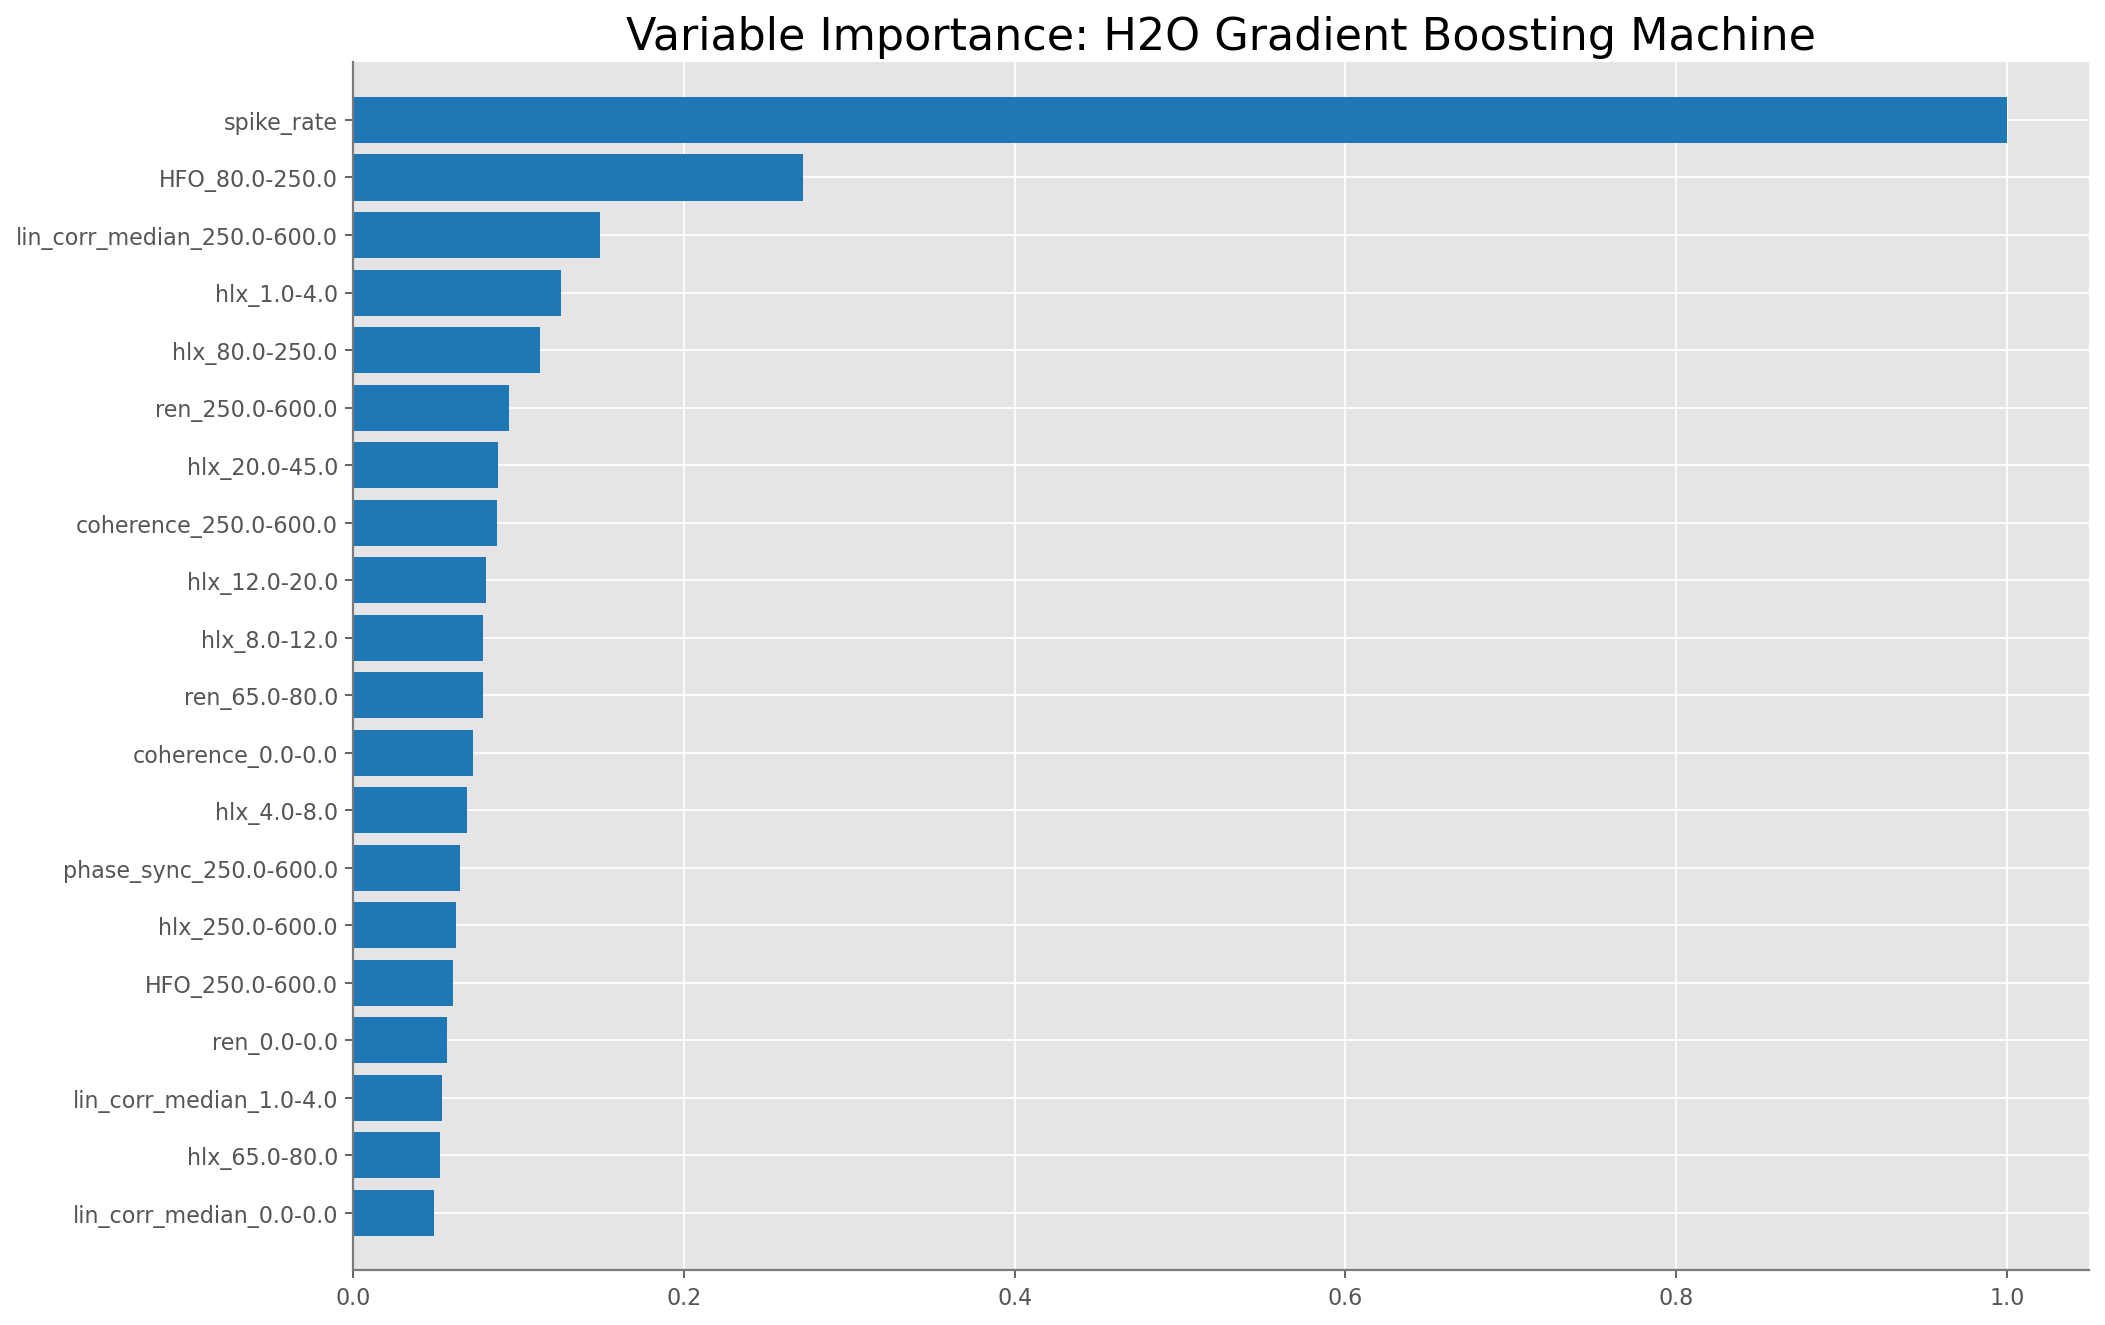

<Figure size 2240x1120 with 0 Axes>

In [36]:
# Show variable importance

model.varimp_plot(num_of_features=20)

In [37]:
# Show variable importance

model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,spike_rate,1114.591675,1.000000,0.295906
1,HFO_80.0-250.0,303.104034,0.271942,0.080469
2,lin_corr_median_250.0-600.0,166.422089,0.149312,0.044182
3,hlx_1.0-4.0,139.812134,0.125438,0.037118
4,hlx_80.0-250.0,125.651978,0.112734,0.033359
5,ren_250.0-600.0,105.039894,0.094241,0.027886
6,hlx_20.0-45.0,97.624573,0.087588,0.025918
7,coherence_250.0-600.0,97.014107,0.087040,0.025756
8,hlx_12.0-20.0,89.338211,0.080153,0.023718
9,hlx_8.0-12.0,87.587029,0.078582,0.023253


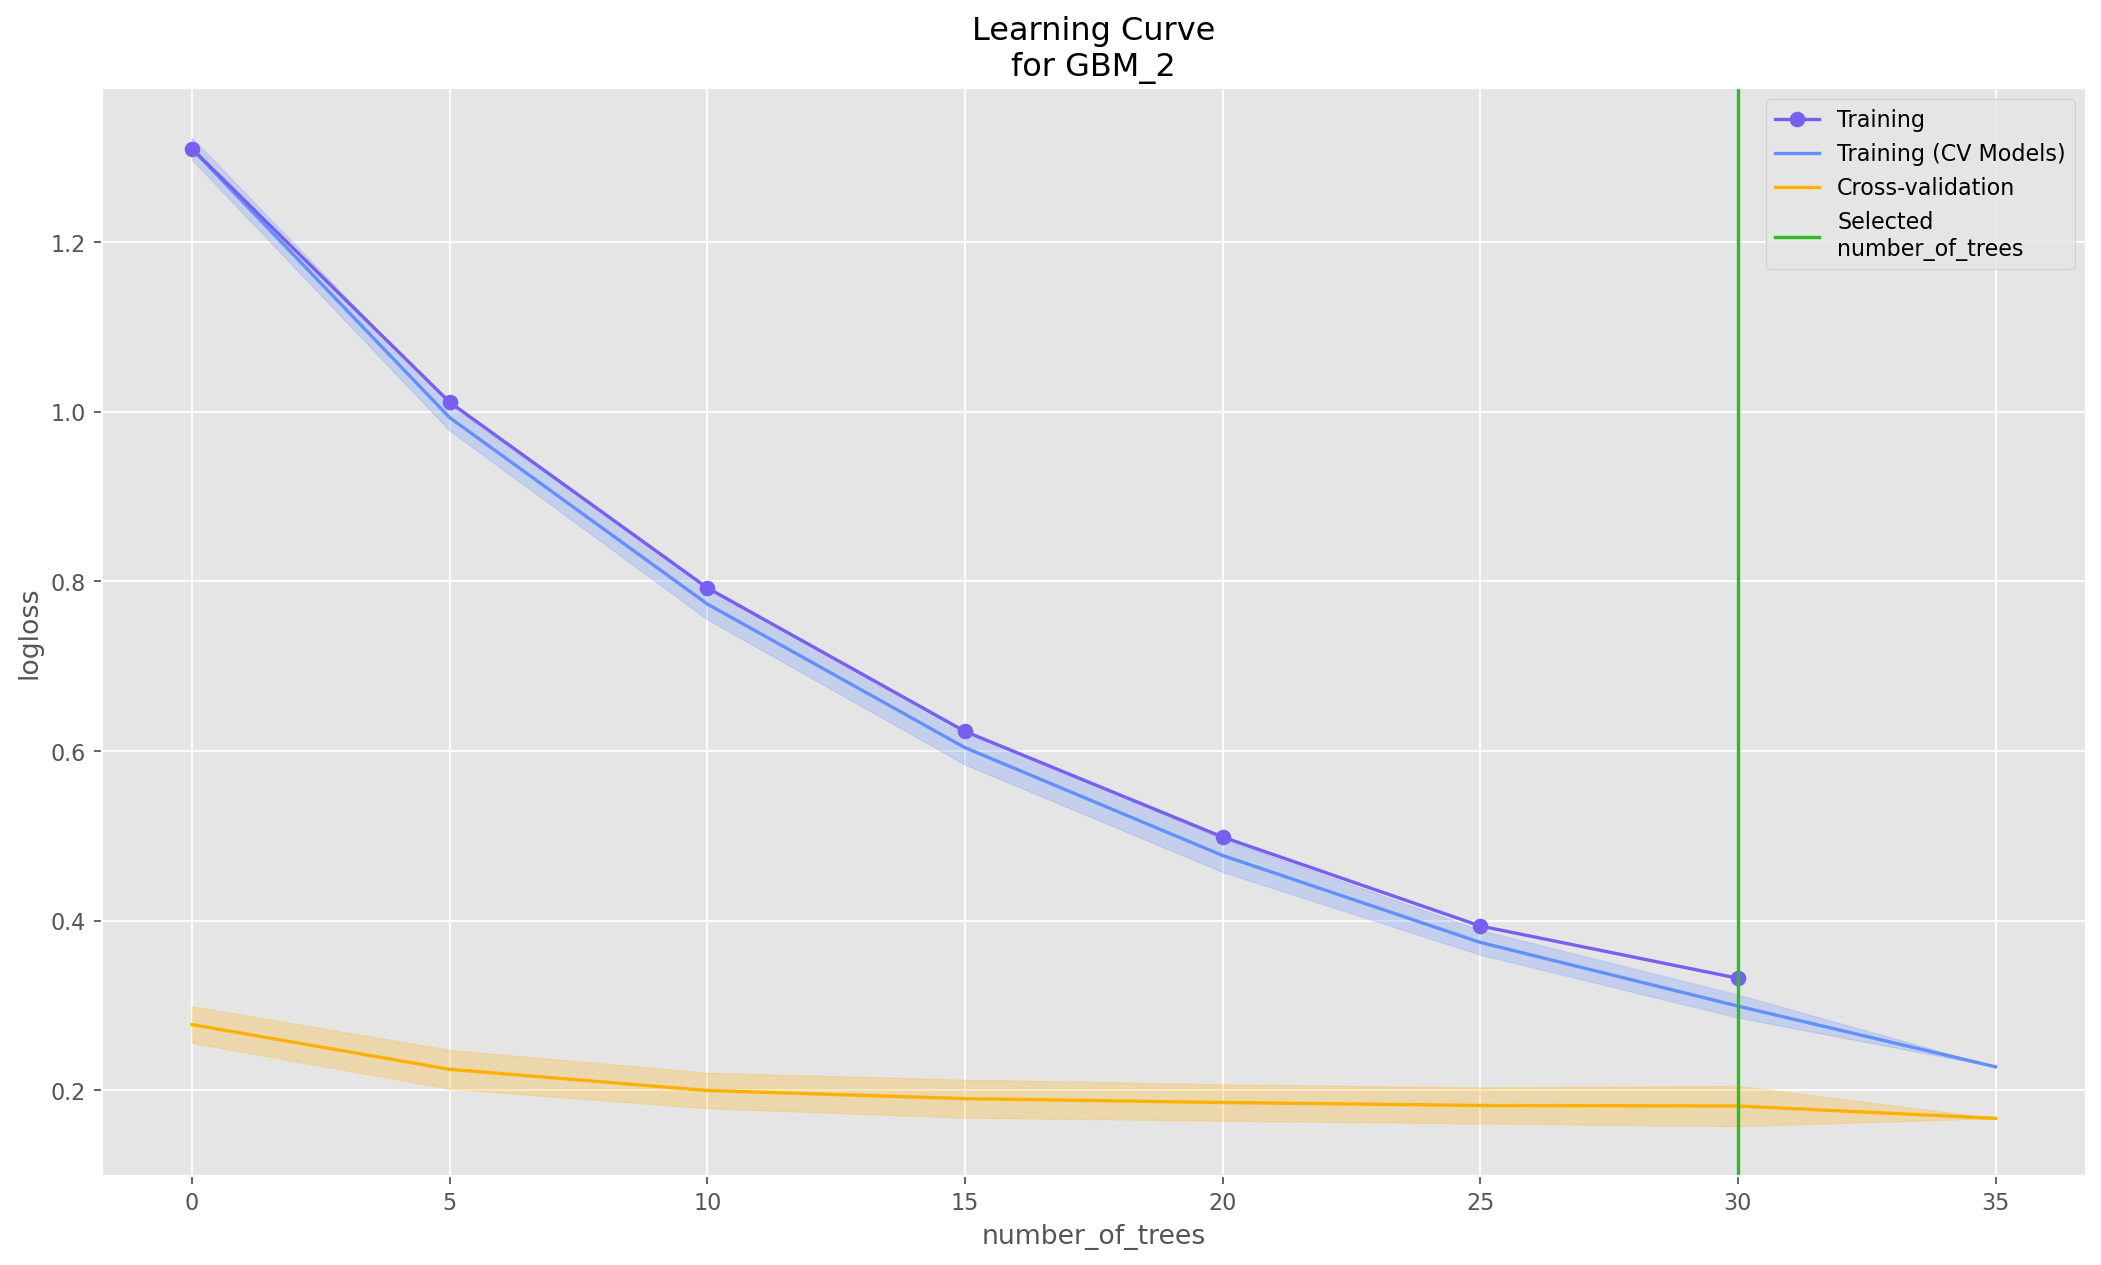

In [38]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [41]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [42]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country,predict,NON_SOZ,SOZ
1041,la1,0,NON_SOZ,11,61,41,0,0.527295,0.190212,0.194513,0.181204,0.0426852,0.00136469,0.00188454,0.00015692,33.6446,1.29066,1.06754,1.02418,1.03551,1.09748,1.00632,1.2024,1.07743,0.388762,0.00372628,-0.000426247,0.0150321,0.792932,0.302037,0.737508,0.915868,0.766867,0.290521,0.738388,0.92736,0.83171,0.115445,0.791712,0.939734,0.945383,0.0411876,0.920198,0.978864,0.962987,0.0261345,0.95076,0.984936,0.961084,0.0496987,0.947875,0.984971,0.910489,0.044301,0.890241,0.962474,0.936287,0.0476332,0.902236,0.967007,0.899467,0.0326415,0.821885,0.936441,4,0,Montreal,NON_SOZ,0.809152,0.190848
1041,la10,1,NON_SOZ,11,4,2,15,0.522892,0.288765,0.290193,0.262431,0.0564744,0.0016953,0.00254204,0.000214721,23.177,1.29184,1.06602,1.02394,1.03602,1.09603,1.00626,1.19878,1.07748,0.424,0.000707439,-0.00498672,0.0592447,0.6803,0.244885,0.630371,0.881626,0.762135,0.273154,0.760569,0.931511,0.881402,0.0940251,0.85708,0.960108,0.947005,0.0446041,0.914999,0.978202,0.959163,0.0286842,0.923924,0.982255,0.948641,0.0271543,0.896675,0.976166,0.916616,0.0206364,0.849197,0.963806,0.924675,0.0274313,0.85371,0.961169,0.906775,0.0237796,0.829388,0.940038,4,0,Montreal,NON_SOZ,0.729379,0.270621
1041,la2,0,NON_SOZ,11,58,38,80,0.556295,0.230107,0.266866,0.252279,0.0562708,0.00209894,0.00280625,0.000218766,29.981,1.28175,1.06643,1.0234,1.03509,1.09766,1.00623,1.20253,1.07755,0.394428,0.00612362,0.00373939,0.022959,0.958455,0.106217,0.922558,0.98158,0.971633,0.112984,0.953992,0.989006,0.989996,0.0217556,0.9757,0.995651,0.997628,0.00455479,0.992983,0.998909,0.997676,0.00379807,0.993624,0.999001,0.996479,0.00397379,0.989933,0.998266,0.962598,0.0141015,0.948792,0.982798,0.976427,0.0143832,0.95995,0.987514,0.966528,0.0130487,0.923064,0.97745,4,0,Montreal,SOZ,0.578417,0.421583
1041,la3,1,NON_SOZ,11,75,11,71,0.614911,0.270569,0.340979,0.322704,0.0708394,0.00220846,0.0032064,0.000275031,36.7503,1.27678,1.06616,1.02329,1.0348,1.09708,1.0064,1.20171,1.07746,0.389213,0.00369222,-0.00572462,0.0259905,0.971121,0.088594,0.942822,0.985672,0.982456,0.0793925,0.96498,0.992719,0.99378,0.0152694,0.984235,0.997443,0.998218,0.00330717,0.994412,0.999223,0.998604,0.00232192,0.996428,0.99936,0.998303,0.00191977,0.994496,0.999181,0.994341,0.00354329,0.98573,0.997313,0.994595,0.0044201,0.983385,0.996947,0.968313,0.0123752,0.92604,0.978447,4,0,Montreal,SOZ,0.686549,0.313451
1041,la4,1,NON_SOZ,11,89,7,65,0.674321,0.34015,0.461153,0.438884,0.0948376,0.00289858,0.00426716,0.000374427,39.5949,1.27475,1.06517,1.02307,1.03491,1.09671,1.00636,1.20223,1.07714,0.390298,0.00152352,-0.0110037,0.0269358,0.978772,0.0755761,0.955732,0.989625,0.988753,0.058656,0.976284,0.995803,0.996611,0.00969291,0.990866,0.998633,0.999109,0.0019704,0.997032,0.999589,0.999254,0.00112445,0.997988,0.999645,0.999252,0.00109846,0.997518,0.999637,0.998036,0.00159994,0.99385,0.999023,0.996223,0.00298049,0.986928,0.997876,0.968713

In [43]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['onset_channel', 'predict']].tail(50)
preds

,onset_channel,predict
57,SOZ,NON_SOZ
58,SOZ,NON_SOZ
59,SOZ,NON_SOZ
60,SOZ,NON_SOZ
61,NON_SOZ,NON_SOZ
62,NON_SOZ,NON_SOZ
63,NON_SOZ,NON_SOZ
64,NON_SOZ,NON_SOZ
65,NON_SOZ,NON_SOZ
66,NON_SOZ,NON_SOZ


In [44]:
# Save the results

df.to_csv('df.csv')
preds.to_csv('preds.csv')

In [46]:
#--------------------------------

In [47]:
# Parse dataframes to H2o

train = h2o.H2OFrame(training_df_drop)
test = h2o.H2OFrame(testing_df_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [48]:
# Define X and y

X = train.columns
y = 'onset_channel'
X.remove(y)

In [49]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [50]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |
06:06:11.291: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 9min 54s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_2_20220906_60611

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0027014420993305005
RMSE: 0.051975398981927025
LogLoss: 0.023545670813054694
Null degrees of freedom: 1853
Residual degrees of freedom: 1844
Null deviance: 1027.216230501327
Residual deviance: 87.30734737480678
AIC: 107.30734737480678
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8461928807731816: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1707.0,0.0,0.0,(0.0/1707.0)
1,SOZ,0.0,147.0,0.0,(0.0/147.0)
2,Total,1707.0,147.0,0.0,(0.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.846193,1.000000,67.0
1,max f2,0.846193,1.000000,67.0
2,max f0point5,0.846193,1.000000,67.0
3,max accuracy,0.846193,1.000000,67.0
4,max precision,0.998935,1.000000,0.0
5,max recall,0.846193,1.000000,67.0
6,max specificity,0.998935,1.000000,0.0
7,max absolute_mcc,0.846193,1.000000,67.0
8,max min_per_class_accuracy,0.846193,1.000000,67.0
9,max mean_per_class_accuracy,0.846193,1.000000,67.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  9.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.998491,12.612245,12.612245,1.000000,0.998731,1.000000,0.998731,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.996703,12.612245,12.612245,1.000000,0.997610,1.000000,0.998170,0.129252,0.258503,1161.224490,1161.224490,0.258503
2,3,0.030205,0.995219,12.612245,12.612245,1.000000,0.995852,1.000000,0.997425,0.122449,0.380952,1161.224490,1161.224490,0.380952
3,4,0.040453,0.993118,12.612245,12.612245,1.000000,0.994414,1.000000,0.996662,0.129252,0.510204,1161.224490,1161.224490,0.510204
4,5,0.050162,0.990640,12.612245,12.612245,1.000000,0.991880,1.000000,0.995737,0.122449,0.632653,1161.224490,1161.224490,0.632653
5,6,0.100324,0.156152,7.323239,9.967742,0.580645,0.664389,0.790323,0.830063,0.367347,1.000000,632.323897,896.774194,0.977153
6,7,0.149946,0.069535,0.000000,6.669065,0.000000,0.103464,0.528777,0.589606,0.000000,1.000000,-100.000000,566.906475,0.923257
7,8,0.200108,0.042610,0.000000,4.997305,0.000000,0.054601,0.396226,0.455494,0.000000,1.000000,-100.000000,399.730458,0.868776
8,9,0.299892,0.021499,0.000000,3.334532,0.000000,0.030946,0.264388,0.314232,0.000000,1.000000,-100.000000,233.453237,0.760398
9,10,0.400216,0.010477,0.000000,2.498652,0.000000,0.015543,0.198113,0.239359,0.000000,1.000000,-100.000000,149.865229,0.651435




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03790995661953571
RMSE: 0.19470479351966585
LogLoss: 0.13600319746392495
Null degrees of freedom: 1853
Residual degrees of freedom: 1844
Null deviance: 1029.4498221046194
Residual deviance: 504.2998561962337
AIC: 524.2998561962337
AUC: 0.9431273388089858
AUCPR: 0.7210337989975174
Gini: 0.8862546776179716

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35249739697138116: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1671.0,36.0,0.0211,(36.0/1707.0)
1,SOZ,55.0,92.0,0.3741,(55.0/147.0)
2,Total,1726.0,128.0,0.0491,(91.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.352497,0.669091,107.0
1,max f2,0.105459,0.710928,208.0
2,max f0point5,0.623784,0.755694,71.0
3,max accuracy,0.623784,0.954153,71.0
4,max precision,0.998398,1.000000,0.0
5,max recall,0.000904,1.000000,399.0
6,max specificity,0.998398,1.000000,0.0
7,max absolute_mcc,0.352497,0.644516,107.0
8,max min_per_class_accuracy,0.064970,0.870748,247.0
9,max mean_per_class_accuracy,0.061633,0.879380,251.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  7.93 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.952837,12.612245,12.612245,1.000000,0.977832,1.000000,0.977832,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.899501,10.620838,11.616541,0.842105,0.928094,0.921053,0.952963,0.108844,0.238095,962.083781,1061.654135,0.236338
2,3,0.030205,0.832543,9.809524,11.035714,0.777778,0.871058,0.875000,0.926636,0.095238,0.333333,880.952381,1003.571429,0.329233
3,4,0.040453,0.728666,10.620838,10.930612,0.842105,0.783184,0.866667,0.890295,0.108844,0.442177,962.083781,993.061224,0.436319
4,5,0.050162,0.524479,8.408163,10.442396,0.666667,0.624560,0.827957,0.838863,0.081633,0.523810,740.816327,944.239631,0.514436
5,6,0.100324,0.194752,3.797235,7.119816,0.301075,0.327677,0.564516,0.583270,0.190476,0.714286,279.723502,611.981567,0.666834
6,7,0.149946,0.097263,2.193434,5.489502,0.173913,0.135244,0.435252,0.435002,0.108844,0.823129,119.343390,448.950228,0.731155
7,8,0.200108,0.058246,1.356155,4.453380,0.107527,0.074348,0.353100,0.344596,0.068027,0.891156,35.615537,345.338027,0.750559
8,9,0.299892,0.032156,0.545394,3.153061,0.043243,0.043356,0.250000,0.244363,0.054422,0.945578,-45.460563,215.306122,0.701290
9,10,0.400216,0.018473,0.271231,2.430662,0.021505,0.024842,0.192722,0.189335,0.027211,0.972789,-72.876893,143.066175,0.621881




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.952547,0.014403,0.960630,0.960227,0.955614,0.959239,0.927027
1,auc,0.945318,0.009470,0.956267,0.952617,0.941876,0.932255,0.943572
2,err,0.047453,0.014403,0.039370,0.039773,0.044386,0.040761,0.072973
3,err_count,17.600000,5.366563,15.000000,14.000000,17.000000,15.000000,27.000000
4,f0point5,0.710543,0.084755,0.731707,0.691489,0.786517,0.769231,0.573770
5,f1,0.687517,0.060482,0.705882,0.650000,0.767123,0.705882,0.608696
6,f2,0.668802,0.050845,0.681818,0.613208,0.748663,0.652174,0.648148
7,lift_top_group,12.963039,2.235498,14.111111,16.000000,10.078947,12.689655,11.935484
8,logloss,0.135971,0.014932,0.121580,0.124768,0.137337,0.136599,0.159571
9,max_per_class_error,0.341495,0.056036,0.333333,0.409091,0.263158,0.379310,0.322581



See the whole table with table.as_data_frame()


In [51]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_4_AutoML_2_20220906_60611,0.943127,0.136003,0.721034,0.19762,0.194705,0.03791
StackedEnsemble_BestOfFamily_4_AutoML_2_20220906_60611,0.942994,0.135735,0.724021,0.16354,0.194485,0.0378244
StackedEnsemble_BestOfFamily_6_AutoML_2_20220906_60611,0.942617,0.135673,0.725521,0.166942,0.194404,0.0377929
StackedEnsemble_AllModels_3_AutoML_2_20220906_60611,0.942011,0.136629,0.721883,0.193453,0.195003,0.0380261
StackedEnsemble_AllModels_1_AutoML_2_20220906_60611,0.941982,0.139524,0.711231,0.199963,0.198108,0.0392466
StackedEnsemble_AllModels_6_AutoML_2_20220906_60611,0.94183,0.135691,0.723498,0.203544,0.193889,0.0375929
StackedEnsemble_BestOfFamily_2_AutoML_2_20220906_60611,0.941633,0.14028,0.706827,0.214041,0.198433,0.0393757
StackedEnsemble_AllModels_2_AutoML_2_20220906_60611,0.940041,0.141495,0.699736,0.18512,0.19977,0.0399081
StackedEnsemble_Best1000_1_AutoML_2_20220906_60611,0.939907,0.139848,0.706354,0.2019,0.196379,0.0385648
StackedEnsemble_BestOfFamily_3_AutoML_2_20220906_60611,0.939857,0.139898,0.7057,0.168992,0.19782,0.0391329


In [55]:
# One of the leaders model 

model = h2o.get_model('StackedEnsemble_AllModels_4_AutoML_2_20220906_60611')

In [56]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.2178753076951939
RMSE: 0.4667711513099261
LogLoss: 0.6774202444476664
Null degrees of freedom: 106
Residual degrees of freedom: 97
Null deviance: 154.9934846097905
Residual deviance: 144.96793231180058
AIC: 164.96793231180058
AUC: 0.6943942133815552
AUCPR: 0.34923699660181357
Gini: 0.3887884267631103

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.048049903817996974: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,42.0,37.0,0.4684,(37.0/79.0)
1,SOZ,2.0,26.0,0.0714,(2.0/28.0)
2,Total,44.0,63.0,0.3645,(39.0/107.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.048050,0.571429,62.0
1,max f2,0.048050,0.742857,62.0
2,max f0point5,0.048050,0.464286,62.0
3,max accuracy,0.805816,0.728972,0.0
4,max precision,0.115014,0.432432,36.0
5,max recall,0.009984,1.000000,88.0
6,max specificity,0.805816,0.987342,0.0
7,max absolute_mcc,0.048050,0.411111,62.0
8,max min_per_class_accuracy,0.087336,0.632911,46.0
9,max mean_per_class_accuracy,0.048050,0.730108,62.0



Gains/Lift Table: Avg response rate: 26.17 %, avg score: 12.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018692,0.605724,0.000000,0.000000,0.000000,0.705784,0.000000,0.705784,0.000000,0.000000,-100.000000,-100.000000,-0.025316
1,2,0.028037,0.604657,0.000000,0.000000,0.000000,0.605271,0.000000,0.672280,0.000000,0.000000,-100.000000,-100.000000,-0.037975
2,3,0.037383,0.597814,0.000000,0.000000,0.000000,0.600154,0.000000,0.654249,0.000000,0.000000,-100.000000,-100.000000,-0.050633
3,4,0.046729,0.553647,0.000000,0.000000,0.000000,0.587154,0.000000,0.640830,0.000000,0.000000,-100.000000,-100.000000,-0.063291
4,5,0.056075,0.441959,0.000000,0.000000,0.000000,0.447540,0.000000,0.608615,0.000000,0.000000,-100.000000,-100.000000,-0.075949
5,6,0.102804,0.336554,3.057143,1.389610,0.800000,0.412705,0.363636,0.519565,0.142857,0.142857,205.714286,38.961039,0.054250
6,7,0.149533,0.255917,0.764286,1.194196,0.200000,0.280501,0.312500,0.444857,0.035714,0.178571,-23.571429,19.419643,0.039331
7,8,0.205607,0.220996,1.273810,1.215909,0.333333,0.240272,0.318182,0.389061,0.071429,0.250000,27.380952,21.590909,0.060127
8,9,0.299065,0.141379,2.292857,1.552455,0.600000,0.185302,0.406250,0.325386,0.214286,0.464286,129.285714,55.245536,0.223779
9,10,0.401869,0.092077,1.389610,1.510797,0.363636,0.112971,0.395349,0.271047,0.142857,0.607143,38.961039,51.079734,0.278029


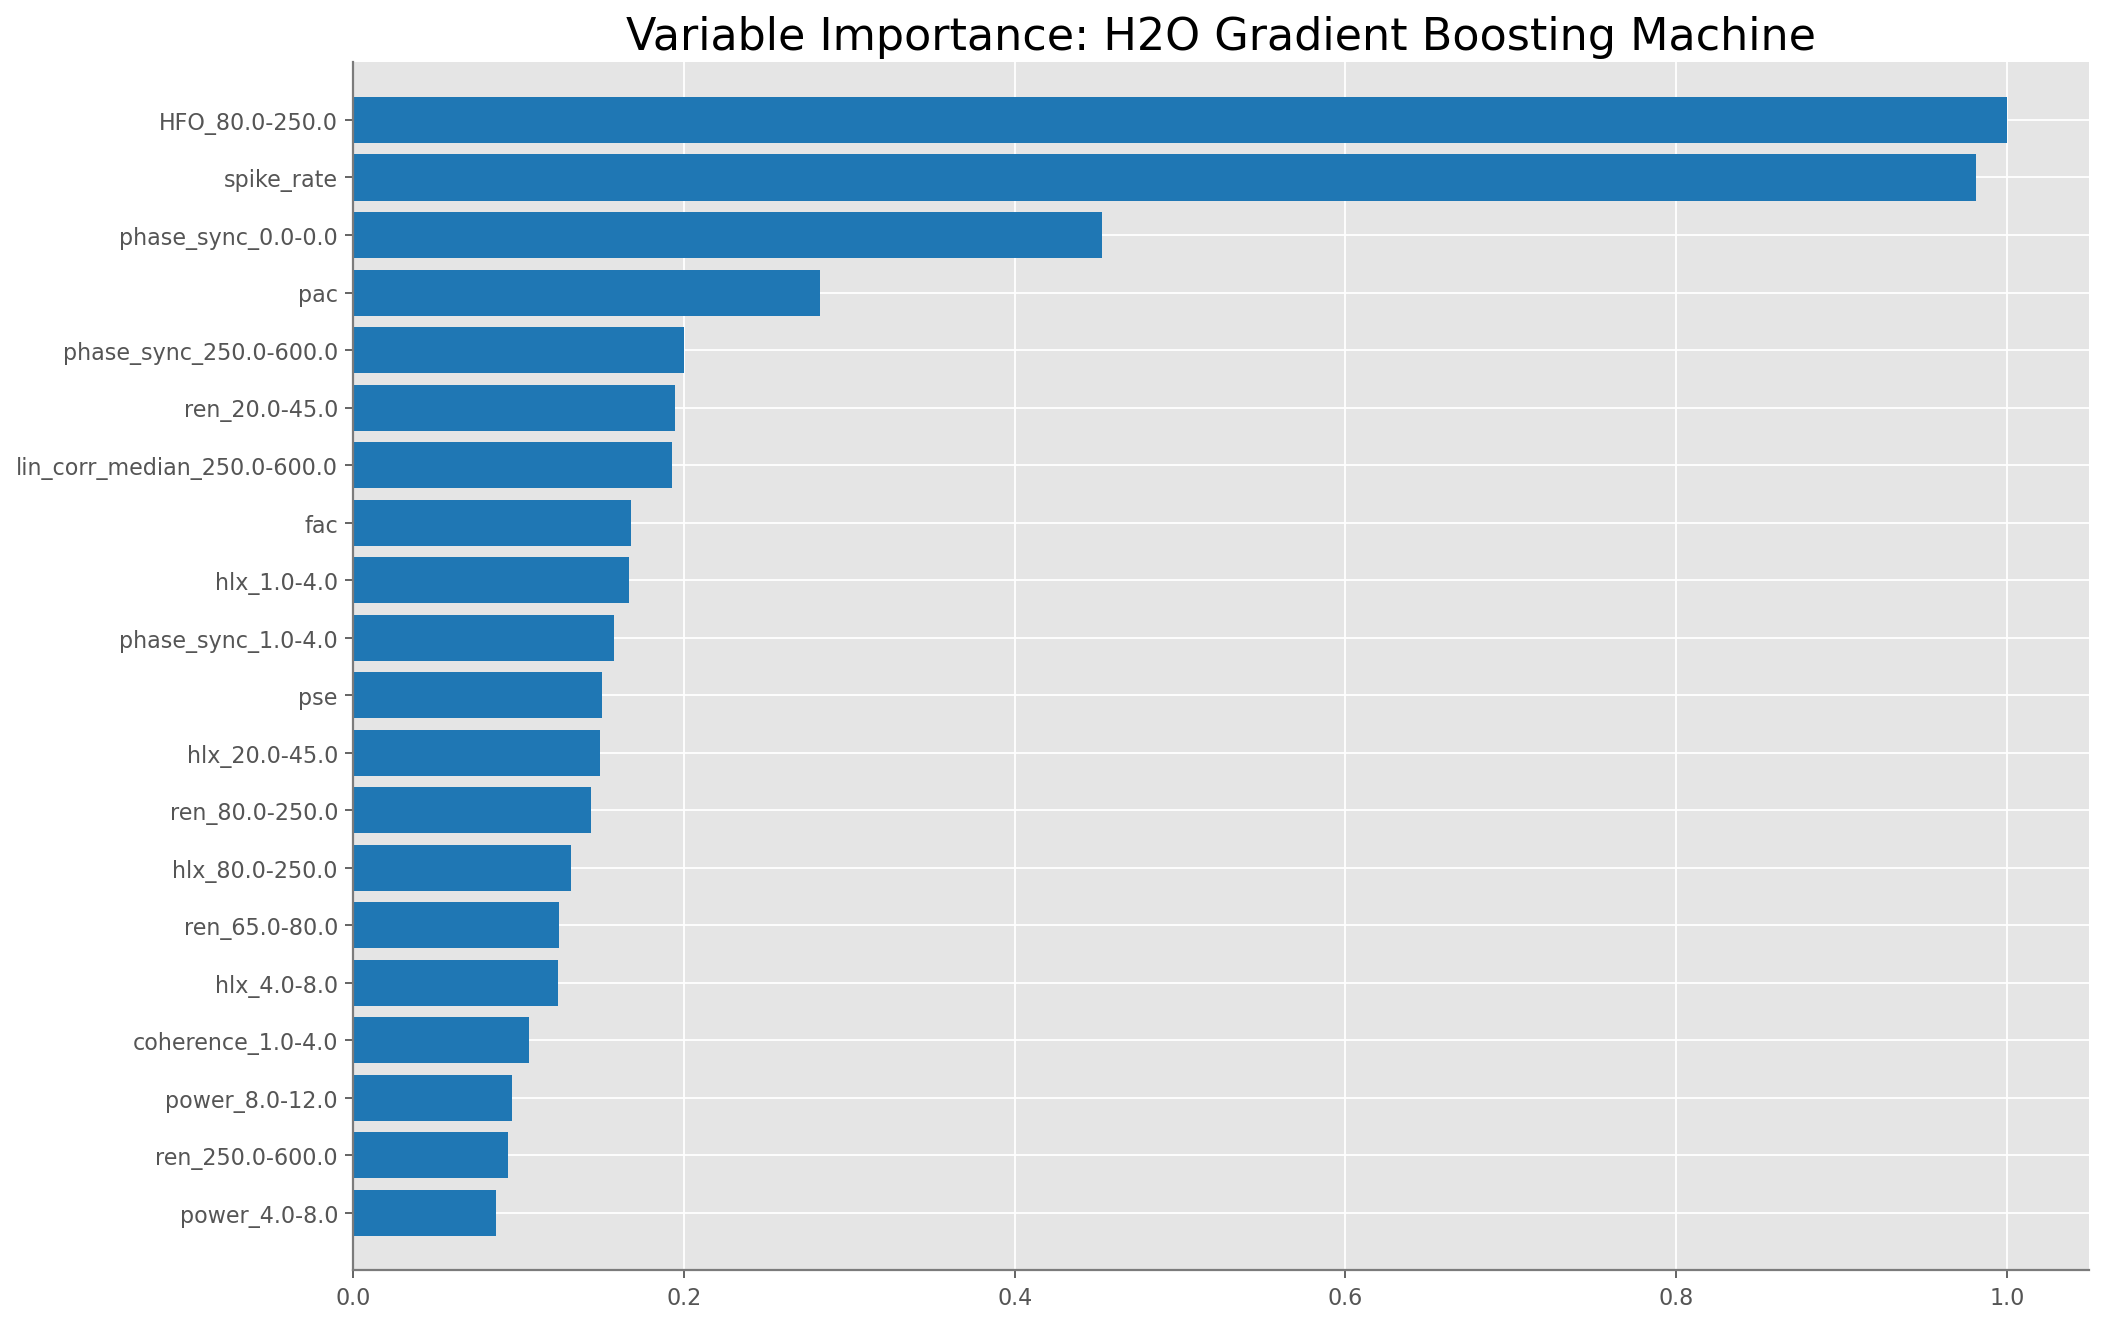

<Figure size 2240x1120 with 0 Axes>

In [54]:
# Show variable importance

model.varimp_plot(num_of_features=20)

In [57]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [58]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,predict,NON_SOZ,SOZ
NON_SOZ,61,41,0,0.527295,0.190212,0.194513,0.181204,0.0426852,0.00136469,0.00188454,0.00015692,33.6446,1.29066,1.06754,1.02418,1.03551,1.09748,1.00632,1.2024,1.07743,0.388762,0.00372628,-0.000426247,0.0150321,0.792932,0.302037,0.737508,0.915868,0.766867,0.290521,0.738388,0.92736,0.83171,0.115445,0.791712,0.939734,0.945383,0.0411876,0.920198,0.978864,0.962987,0.0261345,0.95076,0.984936,0.961084,0.0496987,0.947875,0.984971,0.910489,0.044301,0.890241,0.962474,0.936287,0.0476332,0.902236,0.967007,0.899467,0.0326415,0.821885,0.936441,NON_SOZ,0.78114,0.21886
NON_SOZ,4,2,15,0.522892,0.288765,0.290193,0.262431,0.0564744,0.0016953,0.00254204,0.000214721,23.177,1.29184,1.06602,1.02394,1.03602,1.09603,1.00626,1.19878,1.07748,0.424,0.000707439,-0.00498672,0.0592447,0.6803,0.244885,0.630371,0.881626,0.762135,0.273154,0.760569,0.931511,0.881402,0.0940251,0.85708,0.960108,0.947005,0.0446041,0.914999,0.978202,0.959163,0.0286842,0.923924,0.982255,0.948641,0.0271543,0.896675,0.976166,0.916616,0.0206364,0.849197,0.963806,0.924675,0.0274313,0.85371,0.961169,0.906775,0.0237796,0.829388,0.940038,NON_SOZ,0.739374,0.260626
NON_SOZ,58,38,80,0.556295,0.230107,0.266866,0.252279,0.0562708,0.00209894,0.00280625,0.000218766,29.981,1.28175,1.06643,1.0234,1.03509,1.09766,1.00623,1.20253,1.07755,0.394428,0.00612362,0.00373939,0.022959,0.958455,0.106217,0.922558,0.98158,0.971633,0.112984,0.953992,0.989006,0.989996,0.0217556,0.9757,0.995651,0.997628,0.00455479,0.992983,0.998909,0.997676,0.00379807,0.993624,0.999001,0.996479,0.00397379,0.989933,0.998266,0.962598,0.0141015,0.948792,0.982798,0.976427,0.0143832,0.95995,0.987514,0.966528,0.0130487,0.923064,0.97745,SOZ,0.575602,0.424398
NON_SOZ,75,11,71,0.614911,0.270569,0.340979,0.322704,0.0708394,0.00220846,0.0032064,0.000275031,36.7503,1.27678,1.06616,1.02329,1.0348,1.09708,1.0064,1.20171,1.07746,0.389213,0.00369222,-0.00572462,0.0259905,0.971121,0.088594,0.942822,0.985672,0.982456,0.0793925,0.96498,0.992719,0.99378,0.0152694,0.984235,0.997443,0.998218,0.00330717,0.994412,0.999223,0.998604,0.00232192,0.996428,0.99936,0.998303,0.00191977,0.994496,0.999181,0.994341,0.00354329,0.98573,0.997313,0.994595,0.0044201,0.983385,0.996947,0.968313,0.0123752,0.92604,0.978447,NON_SOZ,0.709218,0.290782
NON_SOZ,89,7,65,0.674321,0.34015,0.461153,0.438884,0.0948376,0.00289858,0.00426716,0.000374427,39.5949,1.27475,1.06517,1.02307,1.03491,1.09671,1.00636,1.20223,1.07714,0.390298,0.00152352,-0.0110037,0.0269358,0.978772,0.0755761,0.955732,0.989625,0.988753,0.058656,0.976284,0.995803,0.996611,0.00969291,0.990866,0.998633,0.999109,0.0019704,0.997032,0.999589,0.999254,0.00112445,0.997988,0.999645,0.999252,0.00109846,0.997518,0.999637,0.998036,0.00159994,0.99385,0.999023,0.996223,0.00298049,0.986928,0.997876,0.968713,0.0127692,0.927198,0.978726,NON_SOZ,0.859605,0.140395
NON_SOZ,76,4,54,0.710659,0.393055,0.546909,0.519318,0.111019,0.00337491,0.00502206,0.000441948,38.7028,1.26285,1.06544,1.02325,1.03506,1.

In [59]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['onset_channel', 'predict']].tail(50)
preds

,onset_channel,predict
57,SOZ,NON_SOZ
58,SOZ,NON_SOZ
59,SOZ,NON_SOZ
60,SOZ,NON_SOZ
61,NON_SOZ,NON_SOZ
62,NON_SOZ,NON_SOZ
63,NON_SOZ,NON_SOZ
64,NON_SOZ,NON_SOZ
65,NON_SOZ,NON_SOZ
66,NON_SOZ,NON_SOZ


In [60]:
# Save the results

df.to_csv('df.csv')
preds.to_csv('preds.csv')